Suppose we hae assets $X_i$, $i=1,\ldots,n$ in the portfolio, and the market is driven by risk factors $W_j$, $j=1,\ldots,m$. The assets may be any tradable contract (equities, futures, options swaps etc). The risk factors may correspond directly to the drivers of particular assets (WTI price driver), to non-tradable but concrete economic factors (e.g. growth,momentum etc in equities) or to abstract factors (principal components). For the mst part, it is easiest to assume that the risk factors are orthogonal an normalised to unit volatility.

  - $\mu\in\mathbf R^n$ is the target portfolio position aka signal
  - $\mathbf v\in\mathbf R^n$ is the current portfolio position
  
We want to choose the "best" positions to take given $\mu$, $w$, and other constraints and considerations such as trading costs, liquidity, and fungibility of risk between similar assets, i.e. to make a choice for
  
  - $\mathbf w\in\mathbf R^n$, the selected position, or equivalently
  - $\mathbf x=\mathbf w-\mathbf v$, the selected tradelist

Assume that the contribution of each risk factor to the risk of each asset, $r_{i,j}=\frac{\partial X_i}{\partial W_j}$ is known, so $\mathbf R=\{r_{ij}\}\in\mathbb R^{m\times n}$ is the Jacobian of the asset prices with respect to the risk factors 

## Example: A simple equity or futures portfolio

To familiarise with the basic ideas, before considering more complex or nonlinear assets, let's look at a risk-factor approach to the tradelist construction problem in the case of a simple equity universe.

The risk of the current portfolio $\pi=\mathbb v^\top X$ is $\nabla \pi=\mathbf R^\top v$. We would like to have a portfolio that is approximately equivalent in risk terms, but with additional constraints such as a simple "dollar neutrality" condition, $\sum_i w_i=0$. We can view this requirement in any of three equivalent ways: minimising the difference in risk, minimising the variance of the tracking error, or as the solution of a mean-variance optimisation.

### Risk differential interpretation
We can aim to minimise the sum of squared difference in the exposure to each risk-factor, that is

$$\min_{\mathbb w} ||\mathbf R^\top w-\mathbf R^\top\mu||^2\, \textrm{s.t.}\,\sum_i w_i=0$$

As a constrained quadratic problem the optimum is given by solving the linear system

$$ \left(\begin{array}{cc}\mathbf R\mathbf R^\top & 1 \\ 1^\top & 0 \end{array}\right)\left(\begin{array}{c}  w \\ \lambda\end{array}\right)=\left(\begin{array}{c}A \\ 0\end{array}\right)$$

where here $\lambda$ is a Lagrange multiplier.

*In practice this is likely an underspecified problem if the equity universe is large. A real-world example that considers costs, idiosyncratic equity risks and so on would mitigate this, and also require a more general optimisation approach: but our purpose here is a simple illustrative example*

### Residual variance interpretation

The least-squares objective may be written

$$||\mathbf R^\top w-\mathbf R^\top\mu||^2=(w-\mu)^\top\Sigma(w-\mu)$$

where $\Sigma=R^\top R$. Assuming the risk-factros are orthogonal, $\Sigma$ is the covariance matrix of the $X_i$s, and so this quantity is the variance of the residual differential from the target p;ortfolio, $(w-\mu)$, akak the variance of the tracking error.

### Mean-variance interpretation

By expanding out tbe RHS of the "residual variance" interpretation of the objective, we can also (up to a linear transformation which has no impact on the optimisation) write that objective  as

$$\frac{\alpha}{2} \mathbf w^\top\Sigma \mathbf w-\mathbf m^\top\mathbf w$$

This is the same objective as a mean-variance problem where the expected returns are given by $\mathbb m = \Sigma\mu$,  and with a risk-aversion parameter $\alpha$, which can be shown to correspond to the marginal increase in Sharpe ratio required to increase the portfolio volatility by $1 of standard deviation.

## Example: Yield curve  risk

Lets consider an example of multi-veriate linear risk where we have a large number of assets and typically a small number of driving risk factors. We will see that this reamains analogous to the previously discussed simple equity case (we don' need a separate toolkit to consider "curve risk" distinctly from "price risk") but the dimensionality can result in failure to capture idiosyncratic risks and behaviours which may be important.

Yield curve risk or DV01 is exposure to the level and shape of the term structure of forward interest rates. Although there are many different markets and products having exposure to different and interrelated characterstics and sections of the yield curve, we can use essentially the same risk-factor mechanisms as for a portfolio of disparate individual assets, in order to construct our tradelist and portfolio.

As before, we will assume $m$ assets $X_i$ whose prices are funtionals of the yield curve. Whether those assets be bonds, bond futures, interest rate swaps, STIRs or other, their DV01 profile can be characterised as the sensitivities to the forward rates that constitute the yield curve, appropriately discretised into $p$ "buckets" or forward LIBOR rates, so that the returns are given by

$\Delta X_i = \sum_i\ z_{ik}\Delta L_k$

The individual forward rates $L_k$s are not the risk-factors analogous to the $W_j$s in the equity example however - they are far from orthogonal as forward rates adjacent on the curve will have highly correlated behaviour.

Suppose the curve itself is driven by $n$ risk factors $W_j$

$$\Delta L=\mathbf Y\Delta W$$

where $\mathbf Y\mathbf Y^\top=I$, i.e the risk factors are orthonormal.
The columns of $\mathbb Y$ are interpreted as the separate modes of movement in the yield curve, possibly correpsonding to empirical principal components. The covariance surface of the yield curve is then $\mathbf C=\mathbf Y \mathbf Y^\top$, so $cov(dL_i,dL_j)=c_{ij}$. From this we can extract the volatility vector and correlation matrix. A simple 3-factor example is illustrated below.

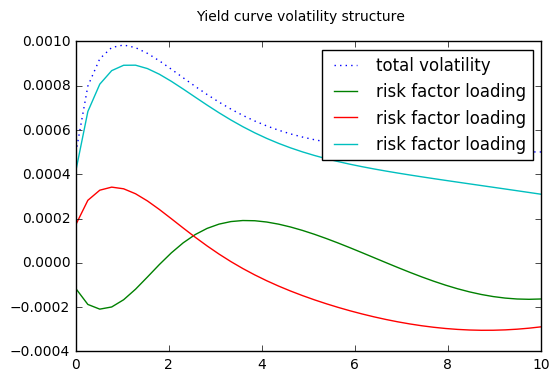

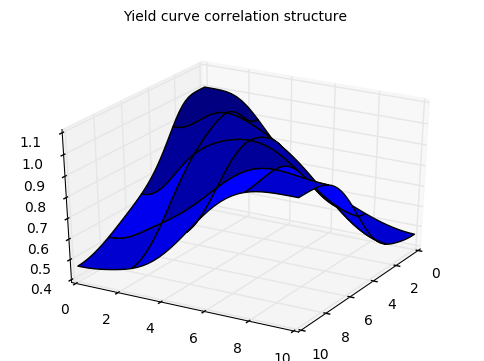

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 40

t = np.linspace(0,10,n)

vol0_2 = (5e-4**2) * 256 # 1bp per day sd
volinf_2 = (5e-4**2) * 256 # 5 bp per day sd

d = volinf_2
a = vol0_2 - volinf_2
b = 0.0005
c = 1

# rebonato parameterisation , but of variance
vol_func = lambda t_val : np.sqrt((a + b*t_val)*np.exp(-c*t_val)+d) / 16
vol = vol_func(t) # in bp per day
fig = plt.figure()
plt.plot(t,vol, label="total volatility", linestyle=":")

corr = np.exp(-0.1*np.abs(t.reshape(1,n)-t.reshape(n,1)))

cov = vol.reshape((len(vol),1)) * vol.reshape((1,len(vol))) * corr

eigval, eigvec = np.linalg.eigh(cov)

Y = eigvec[:,-3:] * np.sqrt(eigval[-3:])
cov = np.dot(Y, np.transpose(Y))
stdev = np.sqrt(np.diag(cov))

corr = cov / stdev.reshape((1,len(stdev))) / stdev.reshape((len(stdev),1))

plt.plot(t,Y, label="risk factor loading")
plt.legend()
fig.suptitle("Yield curve volatility structure")

fig = plt.figure()
ax = fig.gca(projection="3d")
ax1, ax2 =np.meshgrid(t,t)
ax.view_init(30,30)
ax.plot_surface(ax1,ax2,corr)
fig.suptitle("Yield curve correlation structure")

plt.show()



The Jacobian risk matrix of the assets $X$ to the risk factors $W$ is $R=ZY$, and the asset-asset covariance matrix is then
$\Sigma = R^\top R = ZCZ$. Thus, given the shape of the curve risk factors $Y$ and the forward DV01 matrix $Z$, along with our per-asset signals $\mu$, we have a tradelist construction problem of exactly the same form as before.

### Fungibility of curve risk

One problem with this approach is that such a "broad-brush" approach to yield curve risk will potentiall fail to capture the intricacies of the strategy's intentions. A 3-factor model of the yield curve will result in a rank = 3 covariance matrix, and effectively an assumption that the value in any signal can be replicated with any 3 instruments having yield curve sensitivity.

A mnimum (L2) norm solution, the usual approach to underspecified least-squares problems, will result in nonozero weights $x$ on every trade, which would certainly be suboptimal from the point of view of trading costs. We might try to solve this by adding a penalty term for costs into our objective. For instance, a linear cost model would result in an $L_1$ penalty on the trade size, and the elastic net optimisation problem:
$$min_w x^\top\Sigma x+\sum_i|x_i|$$

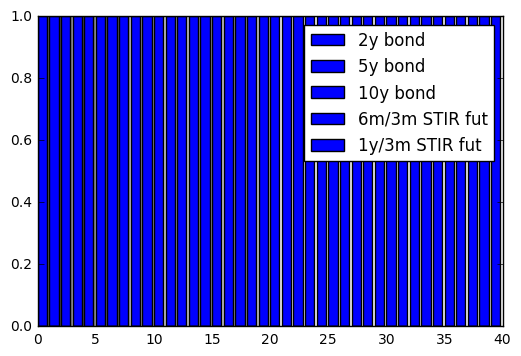

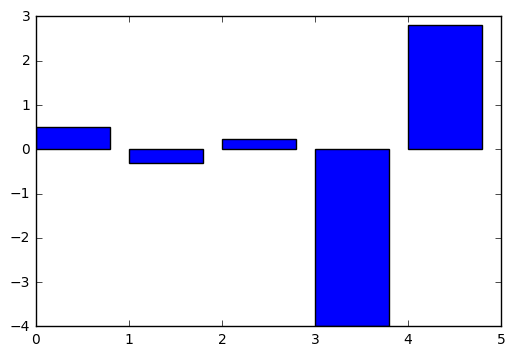

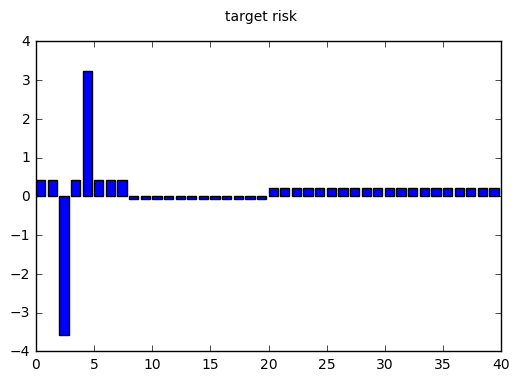

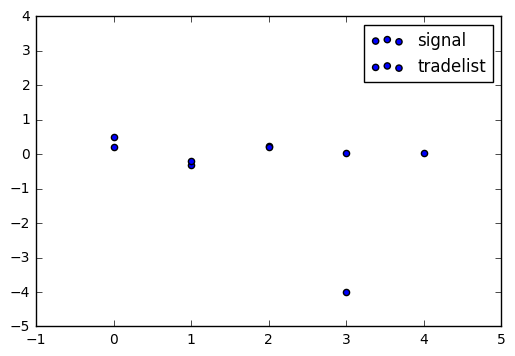

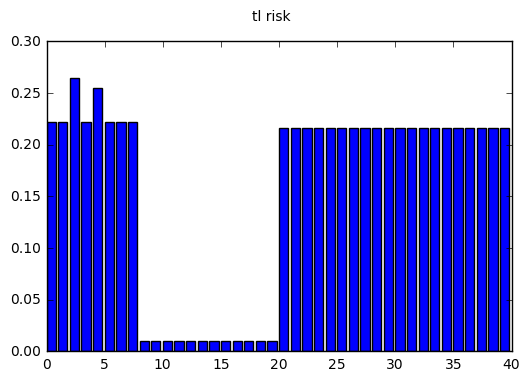

In [46]:
swaps = np.zeros((5,40))
swaps [0,:8] = 1
swaps [1,:20] = 1
swaps [2,:40] = 1
swaps [3,2] = 1
swaps [4,4] = 1

fig = plt.figure()
plt.bar(xrange(40),swaps[0,:], label = "2y bond")
plt.bar(xrange(40),swaps[1,:], label = "5y bond")
plt.bar(xrange(40),swaps[2,:], label = "10y bond")
plt.bar(xrange(40),swaps[3,:], label = "6m/3m STIR fut")
plt.bar(xrange(40),swaps[4,:], label = "1y/3m STIR fut")
plt.legend()
plt.show()

signals = np.array([0.5,0.2,0.1,4,4]) # equal dv01
signals *= np.array([1,-1.5,2.3,-1,0.7])

plt.figure()
plt.bar([0,1,2,3,4],signals)
## ["2y","5y","10y","6m/3m","1y/3m"]
plt.show()

target_risk = np.dot(signals.reshape((1,5)),swaps)
fig = plt.figure()
plt.bar(xrange(40), target_risk.flatten())
fig.suptitle("target risk")
plt.show()

instrument_cov = np.dot(np.dot(swaps, cov), np.transpose(swaps))
instrument_cov_fac = np.dot(swaps, Y)
instrument_cov_2 = np.dot(instrument_cov_fac, np.transpose(instrument_cov_fac))

instrument_cov_fac_t = np.transpose(instrument_cov_fac)



x = np.dot(np.linalg.pinv(instrument_cov_fac_t),np.dot(instrument_cov_fac_t,signals.reshape((5,1))))

plt.figure()
plt.scatter([0,1,2,3,4],signals, label="signal")
plt.scatter([0,1,2,3,4],x, label="tradelist")
plt.legend()
## ["2y","5y","10y","6m/3m","1y/3m"]
plt.show()
## minimise (x-m)'R R'(x-m) = ||R'(x-m)||**2 = R'x -R'm

tradelist_risk = np.dot(x.reshape((1,5)),swaps)
fig = plt.figure()
plt.bar(xrange(40), tradelist_risk.flatten())
fig.suptitle("tl risk")
plt.show()



## Example: Nonlinear risk (options)